# Linear SVM

In [ ]:
# X, y = make_classification(
#     n_samples=120,          # عدد العينات 120 نقطة
#     n_features=2,           # ميزتان (حتى يمكن رسم البيانات ثنائيًا)
#     n_classes=2,            # تصنيف ثنائي (0 و 1)
#     n_clusters_per_class=1, # كل فئة عنقود واحد
#     n_informative=2,        # كل الميزات مفيدة
#     n_redundant=0,          # لا ميزات زائدة
#     class_sep=1.2,          # درجة الفصل بين الفئتين
#     random_state=42         # لضمان نفس النتائج عند التشغيل كل مرة
# )

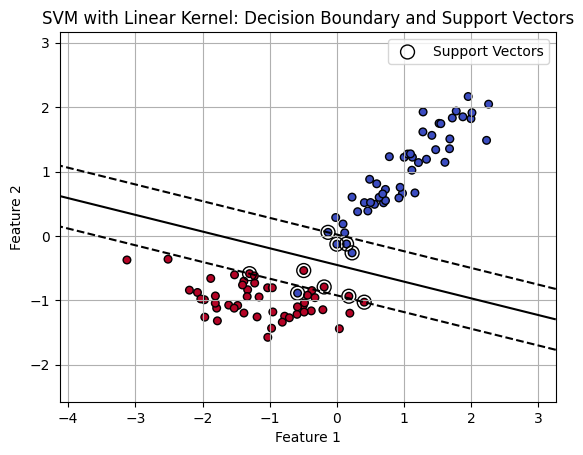

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1,
    n_informative=2, n_redundant=0, class_sep=1
)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Highlight support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100, facecolors='none', edgecolors='k', label='Support Vectors'
)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel: Decision Boundary and Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

# Non-linear SVM

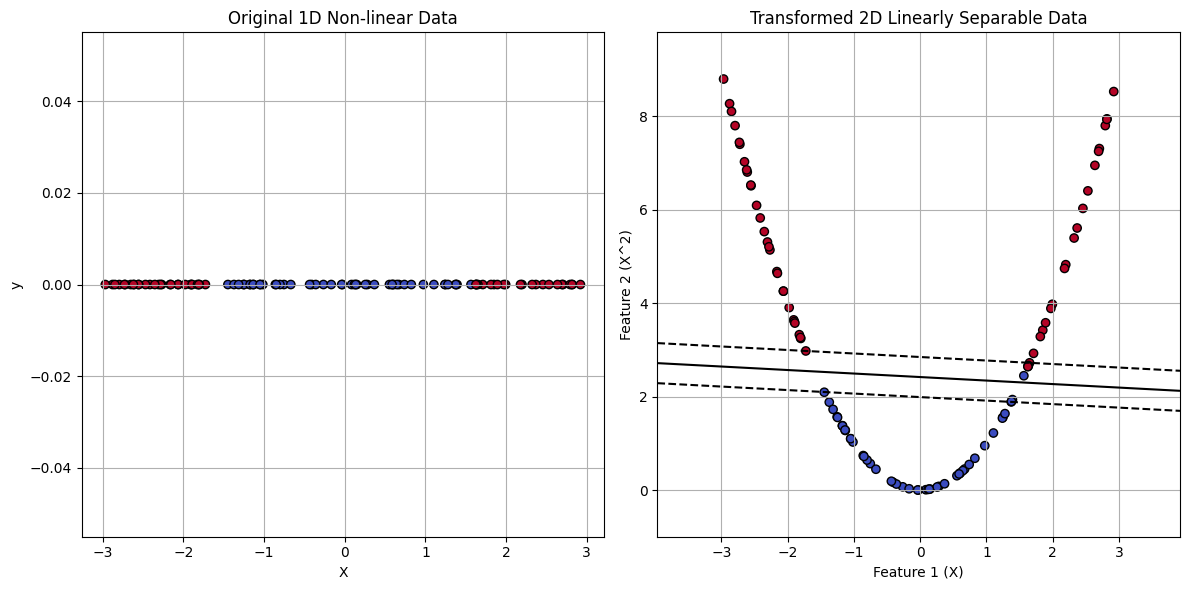

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

# Generate 1D non-linearly separable data
np.random.seed(42)
X = np.random.uniform(-3, 3, (100, 1))
y = (X[:, 0]**2 > 2.5).astype(int)  # Label: 1 if x^2 > 2.5, else 0

# Transform the data into 2D using 2nd-order polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)[:, 1:]  # Exclude the bias term

# Train a linear SVM on the transformed data
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_poly, y)

# Visualize the original data and the decision boundary in 1D
plt.figure(figsize=(12, 6))

# Original 1D data
plt.subplot(1, 2, 1)
plt.scatter(X, np.zeros(X.shape), c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original 1D Non-linear Data')
plt.grid(True)

# Transformed 2D data and decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot the decision boundary in the transformed space
w = clf.coef_[0]
b = clf.intercept_[0]
x_min, x_max = X_poly[:, 0].min() - 1, X_poly[:, 0].max() + 1
y_min, y_max = X_poly[:, 1].min() - 1, X_poly[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

plt.xlabel('Feature 1 (X)')
plt.ylabel('Feature 2 (X^2)')
plt.title('Transformed 2D Linearly Separable Data')
plt.grid(True)

plt.tight_layout()
plt.show()

# Soft vs Hard Margins

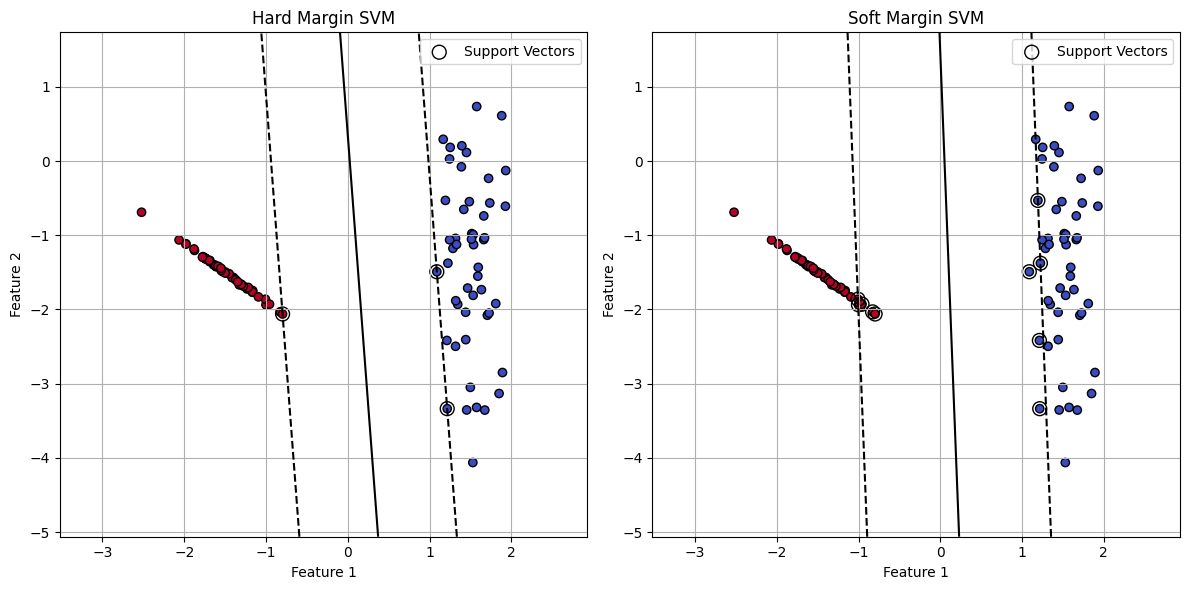

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a synthetic dataset with significant overlap using make_classification
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,  # Lower class_sep increases overlap
)

# Train a hard margin SVM
hard_margin_svm = SVC(kernel='linear', C=1e6)  # Very large C enforces hard margin
hard_margin_svm.fit(X, y)

# Train a soft margin SVM
soft_margin_svm = SVC(kernel='linear', C=0.1)  # Smaller C allows some margin violations
soft_margin_svm.fit(X, y)

# Plotting function
def plot_svm(ax, clf, title):
    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Decision boundary and margins
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Highlight support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100, facecolors='none', edgecolors='k', label='Support Vectors'
    )

    # Title and labels
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot hard margin SVM
plot_svm(axes[0], hard_margin_svm, 'Hard Margin SVM')

# Plot soft margin SVM
plot_svm(axes[1], soft_margin_svm, 'Soft Margin SVM')

plt.tight_layout()
plt.show()

# SVRegression

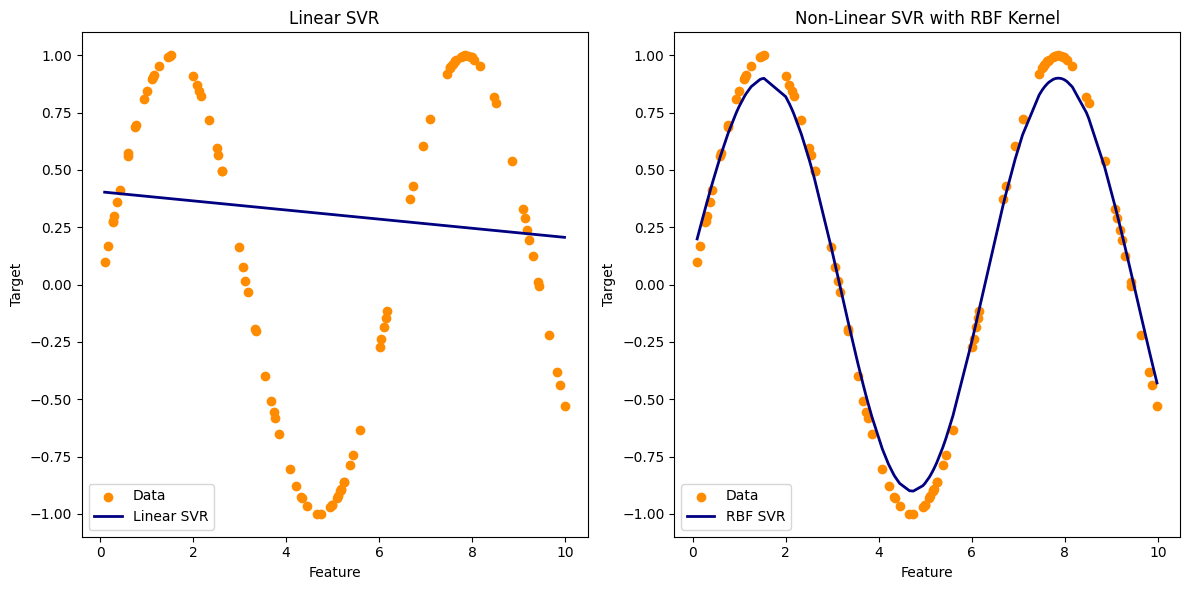

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Create a simple dataset for regression
X = np.sort(np.random.rand(100, 1) * 10, axis=0)  # Random feature values
y = np.sin(X).ravel()  # Sine function for y values (non-linear relationship)

# Linear SVR
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
y_linear = svr_linear.fit(X, y).predict(X)

# Non-linear SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

# Plotting
plt.figure(figsize=(12, 6))

# Linear SVR plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X, y_linear, color='navy', lw=2, label='Linear SVR')
plt.title('Linear SVR')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Non-linear SVR plot
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF SVR')
plt.title('Non-Linear SVR with RBF Kernel')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()